#Car Prices prediction project


##Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import sklearn.model_selection
import sklearn.linear_model
import sklearn.metrics

###Adathalmaz betöltése, majd vizsgálata

In [17]:
cars=pd.read_csv('/content/car data.csv')

In [18]:
cars

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [19]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [20]:
cars.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [21]:
cars.isnull().sum() #megvizsgálom van e null érték, kell e helyettesíteni valamit

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [22]:
#kategorikusak vizsgálata
print(cars['Fuel_Type'].value_counts())
print(cars['Seller_Type'].value_counts())
print(cars['Transmission'].value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


##Kategorikus adatok encode-olása

In [23]:
#Fuel_type
cars.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
cars

<ipython-input-23-2a902e15d843>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cars.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,1,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,0,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,0,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,1,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,0,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,0,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,1,Dealer,Manual,0


In [24]:
#dealer
cars.replace({'Seller_Type':{'Dealer':0, 'Individual':1}},inplace=True)
cars

<ipython-input-24-e77a39618682>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cars.replace({'Seller_Type':{'Dealer':0, 'Individual':1}},inplace=True)


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,Manual,0
1,sx4,2013,4.75,9.54,43000,1,0,Manual,0
2,ciaz,2017,7.25,9.85,6900,0,0,Manual,0
3,wagon r,2011,2.85,4.15,5200,0,0,Manual,0
4,swift,2014,4.60,6.87,42450,1,0,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,Manual,0
297,brio,2015,4.00,5.90,60000,0,0,Manual,0
298,city,2009,3.35,11.00,87934,0,0,Manual,0
299,city,2017,11.50,12.50,9000,1,0,Manual,0


In [26]:
print(cars['Fuel_Type'].value_counts())
print(cars['Seller_Type'].value_counts())
print(cars['Transmission'].value_counts())

Fuel_Type
0    239
1     60
2      2
Name: count, dtype: int64
Seller_Type
0    195
1    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [27]:
#Transmission
cars.replace({'Transmission':{'Manual':0, 'Automatic':1}},inplace=True)
cars

<ipython-input-27-1e769d8ee53b>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cars.replace({'Transmission':{'Manual':0, 'Automatic':1}},inplace=True)


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,0
297,brio,2015,4.00,5.90,60000,0,0,0,0
298,city,2009,3.35,11.00,87934,0,0,0,0
299,city,2017,11.50,12.50,9000,1,0,0,0


##Adatszétválasztás


In [28]:
from sklearn.model_selection import train_test_split

In [29]:
y=cars['Selling_Price']
x=cars.drop(['Car_Name','Selling_Price'],axis=1)

In [30]:
cars

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,0
297,brio,2015,4.00,5.90,60000,0,0,0,0
298,city,2009,3.35,11.00,87934,0,0,0,0
299,city,2017,11.50,12.50,9000,1,0,0,0


In [31]:
x

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.15,random_state=2)##szétosztva az adat 85-15-re

##Modell

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
lr=LinearRegression()

In [35]:
lr.fit(x_train, y_train)

LinearRegression()

##Kiértékelés

In [44]:
training_pred=lr.predict(x_train)

In [45]:
#LinReg, így r^2-vel ellenőrzünk hibát
from sklearn.metrics import r2_score
error=r2_score(y_train, training_pred) #a predikciósat a tanító targettel hasinlítjuk össze
print(error)

0.8788102076855941


##Vizualizáció, hogy milyen is az eredmény

Text(0, 0.5, 'Predicted Price')

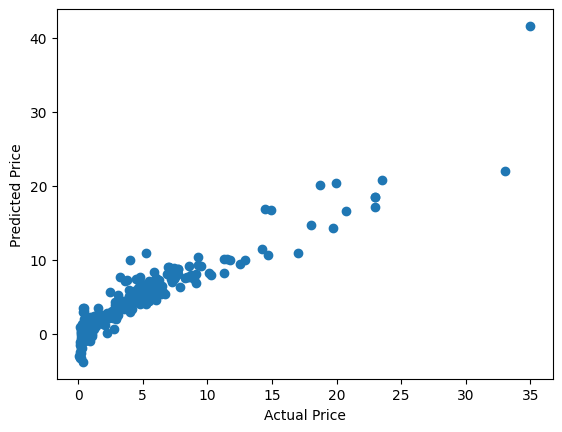

In [48]:
plt.scatter(y_train,training_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

##Teszt adathalmazon is predictelünk

In [50]:
test_pred=lr.predict(x_test)
error_test=r2_score(y_test, test_pred) #a predikciósat a tanító targettel hasinlítjuk össze
print(error_test)

0.8635018684158171


Text(0, 0.5, 'Predicted Price')

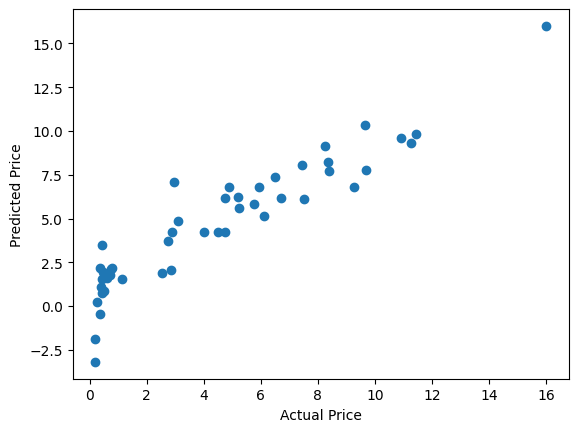

In [51]:
plt.scatter(y_test,test_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

##Lasso Regresszió

általában jobban teljesít, mint a linreg, szóval megnézem, itt is így van-e


In [55]:
from sklearn.linear_model import Lasso
lasso=Lasso()

In [58]:
lasso.fit(x_train, y_train)
lasso_train_pred=lasso.predict(x_train)
lasso_test_pred=lasso.predict(x_test)
error_train=r2_score(y_train, lasso_train_pred)
error_test=r2_score(y_test, lasso_test_pred)
print(error_train)
print(error_test)

0.8400293350672257
0.8940142482159141


Text(0, 0.5, 'Predicted Price')

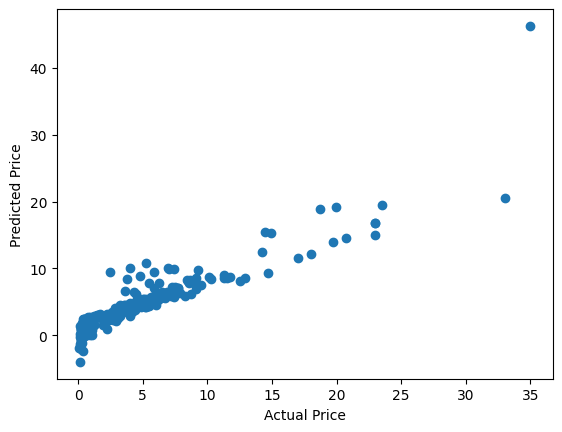

In [59]:
plt.scatter(y_train,lasso_train_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

Text(0, 0.5, 'Predicted Price')

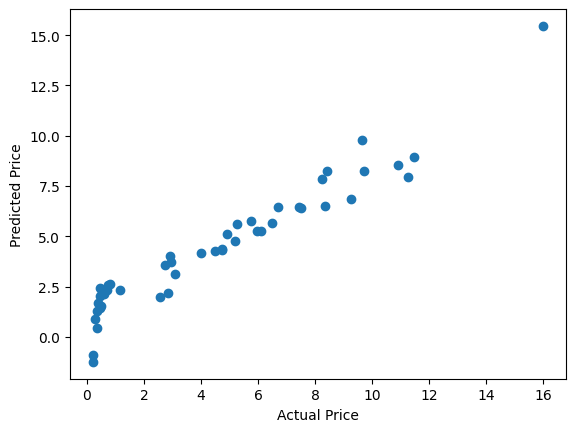

In [60]:
plt.scatter(y_test, lasso_test_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')